## 1. Importing libaries and loading packages

In [43]:
# Package for hopsworks integration
# !pip install -U hopsworks --quiet

# Import standard Python libraries
import pandas as pd 
import hopsworks 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  

# Import other useful libraries
import uuid  # Unique identifier generation
import requests  # For making API requests
import json  
import io 
import os
import base64 
from datetime import datetime, timedelta  # Date/time handling and manipulation
import pytz  # Timezone conversions and support

# Environment variable management
from dotenv import load_dotenv
load_dotenv()

True

## 2. Loading sensor data

In [2]:
# getting the time for now, tomorrow and yesterday
now = datetime.now()  # Get current time 
today = now 
yesterday = today - timedelta(days=1)
tomorrow = today + timedelta(days=1)
print(today, yesterday, tomorrow)

2024-05-23 22:38:21.576045 2024-05-22 22:38:21.576045 2024-05-24 22:38:21.576045


In [3]:
# Format 'today', 'tomorrow', and 'yesterday' as "YYYY-MM-DD"
formatted_today = today.strftime('%Y-%m-%d %H:%M:%S')
formatted_tomorrow = tomorrow.strftime('%Y-%m-%d %H:%M:%S')
formatted_yesterday = yesterday.strftime('%Y-%m-%d %H:%M:%S')

In [4]:
# defining API information
dev_eui_building = "0080E115003BEA91"
dev_eui_bikelane = "0080E115003E3597"
url = "https://data.sensade.com"

basic_auth = base64.b64encode(f"{os.getenv('API_USERNAME')}:{os.getenv('API_PASSWORD')}".encode())
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Basic {basic_auth.decode("utf-8")}'
}

In [5]:
# Function to ping the API and get data in a given time interval
def API_call(dev_eui, from_date, to_date):
    payload = json.dumps({
    "dev_eui": dev_eui,
    "from": from_date,
    "to": to_date
})

    API_response = requests.request("GET", url, headers=headers, data=payload)

    if API_response.status_code != 200:
        exit(13)

    csv_data = API_response.text
    df = pd.read_csv(io.StringIO(csv_data))
    return df

In [6]:
# march_building = API_call(dev_eui_building, "2024-03-01", "2024-04-01")
# march_bikelane = API_call(dev_eui_bikelane, "2024-03-01", "2024-04-01")
# april_building = API_call(dev_eui_building, "2024-04-01", "2024-05-01")
# april_bikelane = API_call(dev_eui_bikelane, "2024-04-01", "2024-05-01")

In [7]:
# building_historic_df = pd.concat([march_building, april_building], ignore_index=True)
# bikelane_historic_df = pd.concat([march_bikelane, april_bikelane], ignore_index=True)

In [8]:
# saving the data as CSV
# building_historic_df.to_csv('test_building_data.csv', index=False)
# bikelane_historic_df.to_csv('test_bikelane_data.csv', index=False)

In [9]:
#loading the data saved in the directory
building_historic_df = pd.read_csv('test_building_data.csv')
bikelane_historic_df = pd.read_csv('test_bikelane_data.csv')

In [10]:
building_historic_df.head()

,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi,hw_fw_version
0,2024-03-01 00:03:31.999000,NaN,5.500,312,-465,-991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X
1,2024-03-01 00:13:30.999000,NaN,5.500,309,-463,-992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X
2,2024-03-01 00:23:31.999000,3.16,5.375,312,-466,-987,4.0,5.0,6.0,6.0,4.0,6.0,6.0,5.0,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X
3,2024-03-01 00:33:33.017000,NaN,5.375,312,-464,-997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1511,5,1.2,-89,DataVersion.HW_2FW2_X_X
4,2024-03-01 00:43:33.017000,NaN,5.375,310,-467,-993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1511,5,1.2,-89,DataVersion.HW_2FW2_X_X


In [11]:
bikelane_historic_df.head()

,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi,hw_fw_version
0,2024-03-01 00:00:32.251000,NaN,5.25,-253,-27,-630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1459,4,2.5,-86,DataVersion.HW_2FW2_X_X
1,2024-03-01 00:10:32.251000,3.04,5.25,-254,-20,-627,6.0,6.0,6.0,6.0,7.0,7.0,7.0,4.0,PackageType.HEART_BEAT,1459,4,2.5,-86,DataVersion.HW_2FW2_X_X
2,2024-03-01 00:20:33.352000,NaN,5.25,-254,-23,-635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1460,4,NaN,-91,DataVersion.HW_2FW2_X_X
3,2024-03-01 00:30:34.352000,NaN,5.25,-256,-25,-628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PackageType.HEART_BEAT,1460,4,NaN,-91,DataVersion.HW_2FW2_X_X
4,2024-03-01 00:40:33.352000,3.04,5.25,-253,-28,-630,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,PackageType.HEART_BEAT,1460,4,NaN,-91,DataVersion.HW_2FW2_X_X


In [12]:
# Define a function that tries to parse the datetime with microseconds first, and if it fails, parses it without microseconds
def parse_datetime(dt_str):
    try:
        return datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        return datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')

In [13]:
building_historic_df = building_historic_df.copy()
building_historic_df['time'] = building_historic_df['time'].apply(parse_datetime)
bikelane_historic_df = bikelane_historic_df.copy()
bikelane_historic_df['time'] = bikelane_historic_df['time'].apply(parse_datetime)

In [14]:
#create a column for the time in the format of "YYYY-MM-DD HH" to merge with weather data
bikelane_historic_df['time_hour'] = bikelane_historic_df['time'].dt.strftime('%Y-%m-%d %H')
building_historic_df['time_hour'] = building_historic_df['time'].dt.strftime('%Y-%m-%d %H')
# Converting the time_hour column to datetime
bikelane_historic_df['time_hour'] = pd.to_datetime(bikelane_historic_df['time_hour'])
building_historic_df['time_hour'] = pd.to_datetime(building_historic_df['time_hour'])

## 3. Loading weather data

In [15]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [16]:
import openmeteo_requests
import requests_cache
from retry_requests import retry

In [17]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

In [18]:
# The order of variables in hourly or daily is important to assign them correctly below
url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
	"latitude": 57.01,
	"longitude": 9.99,
	"start_date": "2024-03-01",
	"end_date": "2024-04-30",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "snowfall", "snow_depth", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"]
}
responses = openmeteo.weather_api(url_weather, params=params_weather)

In [19]:
# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_rain = hourly.Variables(3).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(4).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(5).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(6).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(7).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(8).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(9).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(10).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(11).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(12).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(13).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe.head()

Coordinates 56.977149963378906°N 10.0632905960083°E
Elevation 23.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


,date,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,snow_depth,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,2024-03-01 00:00:00+00:00,6.2305,87.634949,0.1,0.1,0.0,0.0,5.3805,5.1305,4.0305,3.5805,0.296,0.272,0.29,0.288
1,2024-03-01 01:00:00+00:00,5.7305,88.205788,0.1,0.1,0.0,0.0,5.1305,5.0805,4.0305,3.5805,0.292,0.272,0.29,0.289
2,2024-03-01 02:00:00+00:00,5.2305,89.097878,0.0,0.0,0.0,0.0,4.9305,5.0305,4.0305,3.5805,0.289,0.272,0.29,0.289
3,2024-03-01 03:00:00+00:00,4.7805,90.966789,0.0,0.0,0.0,0.0,4.7305,4.9805,4.0305,3.5805,0.286,0.273,0.29,0.289
4,2024-03-01 04:00:00+00:00,3.6805,94.174324,0.0,0.0,0.0,0.0,4.2305,4.9305,4.0805,3.5805,0.284,0.273,0.29,0.289


In [20]:
#remove the timezone from the date column
hourly_dataframe['date'] = hourly_dataframe['date'].dt.tz_localize(None)
#Convert to datetime object
hourly_dataframe['date'] = pd.to_datetime(hourly_dataframe['date'])

## 4. Merging dataframes

In [21]:
# Merging the weather data with the building sensor data
building_historic_df = pd.merge(building_historic_df, hourly_dataframe, left_on='time_hour', right_on='date', how='left')
# Merging the weather data with the bikelane sensor data
bikelane_historic_df = pd.merge(bikelane_historic_df, hourly_dataframe, left_on='time_hour', right_on='date', how='left')

In [22]:
# removing date column
building_historic_df = building_historic_df.drop(columns=['date'])
bikelane_historic_df = bikelane_historic_df.drop(columns=['date'])

In [23]:
# Create a unique identifier for each row in the datasets
def create_id(df, dataset_name):
    # Assign the sensor prefix based on the dataset name
    if dataset_name == 'building_historic_df':
        df['psensor'] = "BUILDING"
    elif dataset_name == 'bikelane_historic_df':
        df['psensor'] = "BIKELANE"
    else:
        raise ValueError("Unknown dataset name provided")

    # Create a new column 'id' with a unique identifier for each row
    df['id'] = df['time'].astype(str) + '_' + df['psensor']

    return df

In [24]:
# Applying the ID creator function to the datasets
df_bikelane = create_id(bikelane_historic_df, 'bikelane_historic_df')
df_building = create_id(building_historic_df, 'building_historic_df')

In [25]:
#Renaming the radar columns to start with radar to deal with hopsworks problem
df_building = df_building.rename(columns={'0_radar': 'radar_0', '1_radar': 'radar_1', '2_radar': 'radar_2', '3_radar': 'radar_3', '4_radar': 'radar_4', '5_radar': 'radar_5', '6_radar': 'radar_6', '7_radar': 'radar_7'})
df_bikelane = df_bikelane.rename(columns={'0_radar': 'radar_0', '1_radar': 'radar_1', '2_radar': 'radar_2', '3_radar': 'radar_3', '4_radar': 'radar_4', '5_radar': 'radar_5', '6_radar': 'radar_6', '7_radar': 'radar_7'})

In [26]:
# Converting the columns to float
df_building[['x','y','z', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'dr', 'rssi']] = df_building[['x','y','z', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'dr', 'rssi']].astype(float)
df_bikelane[['x','y','z', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'dr', 'rssi']] = df_bikelane[['x','y','z', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'dr', 'rssi']].astype(float)

## Creating full dataframe with backfilled battery and radar columns

In [27]:
building_full_df = df_building.copy()
bikelane_full_df = df_bikelane.copy()

In [29]:
# backfill missing values in radar columns and battery column with the previous value
building_full_df['radar_0'] = building_full_df['radar_0'].bfill()
building_full_df['radar_1'] = building_full_df['radar_1'].bfill()
building_full_df['radar_2'] = building_full_df['radar_2'].bfill()
building_full_df['radar_3'] = building_full_df['radar_3'].bfill()
building_full_df['radar_4'] = building_full_df['radar_4'].bfill()
building_full_df['radar_5'] = building_full_df['radar_5'].bfill()
building_full_df['radar_6'] = building_full_df['radar_6'].bfill()
building_full_df['radar_7'] = building_full_df['radar_7'].bfill()
building_full_df['battery'] = building_full_df['battery'].bfill()
bikelane_full_df['radar_0'] = bikelane_full_df['radar_0'].bfill()
bikelane_full_df['radar_1'] = bikelane_full_df['radar_1'].bfill()
bikelane_full_df['radar_2'] = bikelane_full_df['radar_2'].bfill()
bikelane_full_df['radar_3'] = bikelane_full_df['radar_3'].bfill()
bikelane_full_df['radar_4'] = bikelane_full_df['radar_4'].bfill()
bikelane_full_df['radar_5'] = bikelane_full_df['radar_5'].bfill()
bikelane_full_df['radar_6'] = bikelane_full_df['radar_6'].bfill()
bikelane_full_df['radar_7'] = bikelane_full_df['radar_7'].bfill()
bikelane_full_df['battery'] = bikelane_full_df['battery'].bfill()

## Creating dataframe with only magnetic field data

In [30]:
building_mag_df = building_full_df[['time', 'battery', 'temperature', 'x', 'y', 'z','package_type', 'f_cnt', 'dr', 'snr', 'rssi', 'hw_fw_version',
       'time_hour', 'temperature_2m', 'relative_humidity_2m',
       'precipitation', 'rain', 'snowfall', 'snow_depth',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm']]
bikelane_mag_df = bikelane_full_df[['time', 'battery', 'temperature', 'x', 'y', 'z','package_type', 'f_cnt', 'dr', 'snr', 'rssi', 'hw_fw_version',
       'time_hour', 'temperature_2m', 'relative_humidity_2m',
       'precipitation', 'rain', 'snowfall', 'snow_depth',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm']]


In [39]:
print(building_mag_df.shape)
print(bikelane_mag_df.shape)

(7667, 27)
(7595, 27)


## Creating dataframe with radar data

In [34]:
building_radar_df = df_building[['time', 'battery', 'temperature', 'radar_0', 'radar_1',
       'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'package_type', 'f_cnt', 'dr', 'snr', 'rssi', 'hw_fw_version',
       'time_hour', 'temperature_2m', 'relative_humidity_2m',
       'precipitation', 'rain', 'snowfall', 'snow_depth',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm']]
bikelane_radar_df = df_bikelane[['time', 'battery', 'temperature', 'radar_0', 'radar_1',
       'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'package_type', 'f_cnt', 'dr', 'snr', 'rssi', 'hw_fw_version',
       'time_hour', 'temperature_2m', 'relative_humidity_2m',
       'precipitation', 'rain', 'snowfall', 'snow_depth',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm']]

In [36]:
building_radar_df = building_radar_df.dropna(subset=['battery'])
bikelane_radar_df = bikelane_radar_df.dropna(subset=['battery'])

In [38]:
print(building_radar_df.shape)
print(bikelane_radar_df.shape)

(2685, 32)
(2628, 32)


## Clustering MAG data

In [40]:
building_mag = building_full_df[["x","y","z"]]
bikelane_mag = bikelane_full_df[["x","y","z"]]

In [41]:
# Normalizing the data
scaler = StandardScaler()
building_mag_norm = scaler.fit_transform(building_mag)
bikelane_mag_norm = scaler.fit_transform(bikelane_mag)
# Clustering the magnetic field data with 2 clusters using kmeans
building_kmeans = KMeans(n_clusters=2, random_state=0).fit(building_mag_norm)
bikelane_kmeans = KMeans(n_clusters=2, random_state=0).fit(bikelane_mag_norm)

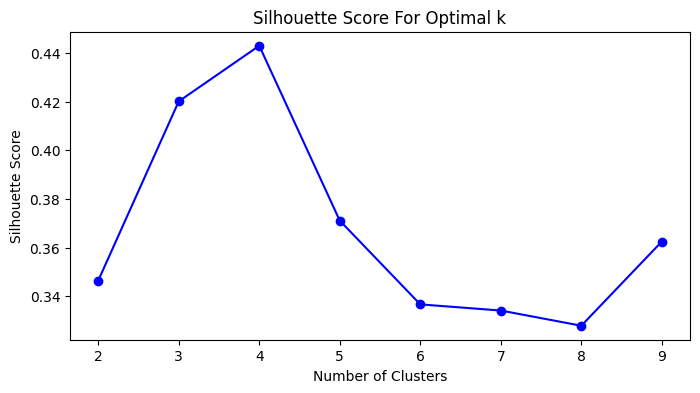

In [44]:
silhouette_avg = []
for k in range(2, 10):  # Starts from 2 clusters 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_mag_norm)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(bikelane_mag_norm, cluster_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_avg, 'bo-')  # Adjust the range as needed
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

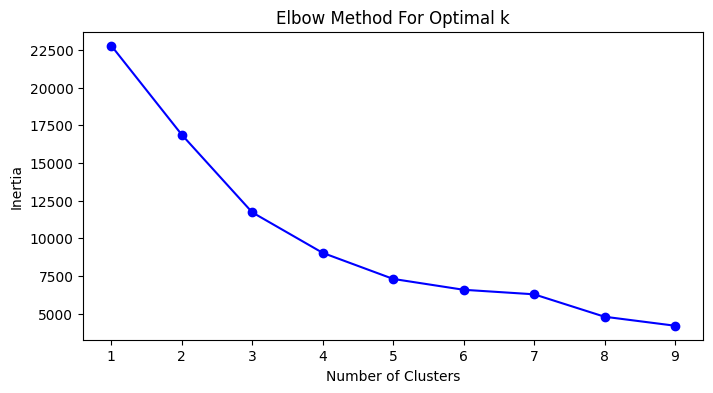

In [45]:
inertia = []
for k in range(1, 10):  
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bikelane_mag_norm)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, 'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
# Adding cluster labels to the mag dataframe
building_mag = building_mag.copy() #dealing with an error
bikelane_mag = bikelane_mag.copy() #dealing with an error
building_mag['mag_cluster'] = building_kmeans.labels_
bikelane_mag['mag_cluster'] = bikelane_kmeans.labels_
building_full_df = building_full_df.copy() #dealing with an error
bikelane_full_df = bikelane_full_df.copy() #dealing with an error
building_full_df['mag_cluster'] = building_mag['mag_cluster']
bikelane_full_df['mag_cluster'] = bikelane_mag['mag_cluster']

In [49]:
# Renaming the cluster labels to 'detection' and 'no_detection'
building_full_df['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)
bikelane_full_df['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)

In [53]:
# Fixing an error with the mag_cluster column type
building_full_df['mag_cluster'] = building_full_df['mag_cluster'].astype(str)
building_full_df['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None
bikelane_full_df['mag_cluster'] = bikelane_full_df['mag_cluster'].astype(str)
bikelane_full_df['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None

In [54]:
bikelane_full_df['mag_cluster'].value_counts()

mag_cluster
no_detection    5006
detection       2589
Name: count, dtype: int64

## EDA on mag

In [56]:
bikelane_mag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7595 entries, 0 to 7594
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   time                           7595 non-null   datetime64[ns]
 1   battery                        7595 non-null   float64       
 2   temperature                    7595 non-null   float64       
 3   x                              7595 non-null   float64       
 4   y                              7595 non-null   float64       
 5   z                              7595 non-null   float64       
 6   package_type                   7595 non-null   object        
 7   f_cnt                          7595 non-null   float64       
 8   dr                             7595 non-null   float64       
 9   snr                            7489 non-null   float64       
 10  rssi                           7595 non-null   float64       
 11  hw_fw_version    

In [ ]:
cm_mag_bikelane = bikelane_mag_df[['battery', 'temperature', 'x', 'y', 'z', 'f_cnt', 'snr', 'rssi', "temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "cloud_cover", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", 'hour', 'day_of_week', 'package_type_encoded']].corr()

# Plotting heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(cm_mag_bikelane, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Magnetic Field data on Bikelane')
plt.show()